# Building a CDS Survival Curve

Understand what a CDS survival curve is

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.products.credit import *
from financepy.products.rates import *
from financepy.utils import *

## Build Ibor Curve

In [3]:
value_dt = Date(20, 12, 2018)
settle_dt = value_dt.add_weekdays(2)

In [4]:
dc_type = DayCountTypes.ACT_360
depo1 = IborDeposit(settle_dt, "1M", 0.022009, dc_type)
depo2 = IborDeposit(settle_dt, "2M", 0.022138, dc_type)
depo3 = IborDeposit(settle_dt, "3M", 0.021810, dc_type)
depo4 = IborDeposit(settle_dt, "6M", 0.020503, dc_type)
depo5 = IborDeposit(settle_dt, "12M", 0.019930, dc_type)
depos = [depo1,depo2,depo3,depo4,depo5]

swap_type = SwapTypes.PAY
dc_type = DayCountTypes.THIRTY_E_360_ISDA
fixed_freq = FrequencyTypes.SEMI_ANNUAL
swap1 = IborSwap(settle_dt,"2Y",swap_type,0.015910,fixed_freq,dc_type)
swap2 = IborSwap(settle_dt,"3Y",swap_type,0.014990,fixed_freq,dc_type)
swap3 = IborSwap(settle_dt,"4Y",swap_type,0.014725,fixed_freq,dc_type)
swap4 = IborSwap(settle_dt,"5Y",swap_type,0.014640,fixed_freq,dc_type)
swap5 = IborSwap(settle_dt,"6Y",swap_type,0.014800,fixed_freq,dc_type)
swap6 = IborSwap(settle_dt,"7Y",swap_type,0.014995,fixed_freq,dc_type)
swap7 = IborSwap(settle_dt,"8Y",swap_type,0.015180,fixed_freq,dc_type)
swap8 = IborSwap(settle_dt,"9Y",swap_type,0.015610,fixed_freq,dc_type)
swap9 = IborSwap(settle_dt,"10Y",swap_type,0.0159880,fixed_freq,dc_type)
swap10 = IborSwap(settle_dt,"12Y",swap_type,0.016430,fixed_freq,dc_type)
swaps = [swap1,swap2,swap3,swap4,swap5,swap6,swap7,swap8,swap9,swap10]

libor_curve = IborSingleCurve(value_dt, depos, [], swaps)

# Build a CDS Curve

In [5]:
cds1 = CDS(settle_dt, "1Y", 0.0200)
cds2 = CDS(settle_dt, "2Y", 0.0220)
cds3 = CDS(settle_dt, "3Y", 0.0250)
cds4 = CDS(settle_dt, "4Y", 0.0275)
cds5 = CDS(settle_dt, "5Y", 0.0290)
cds6 = CDS(settle_dt, "7Y", 0.0300)
cds7 = CDS(settle_dt, "10Y", 0.0310)
cds8 = CDS(settle_dt, "15Y", 0.0315)

In [6]:
cdss = [cds1, cds2, cds3, cds4, cds5, cds6, cds7, cds8]

In [7]:
recovery_rate = 0.40

In [8]:
issuer_curve = CDSCurve(value_dt, cdss, libor_curve, recovery_rate)

## Examine the Survival Curve

In [9]:
print(issuer_curve.times)

[ 0.          1.24931507  2.24931507  3.24931507  4.24931507  5.25205479
  7.25205479 10.25479452 15.25753425]


In [10]:
print(issuer_curve.qs)

[1.         0.95847982 0.91945421 0.87055749 0.81815128 0.76901338
 0.68708328 0.57689901 0.43552977]


In [11]:
times = np.linspace(0.0,20.0,10)

In [12]:
times

array([ 0.        ,  2.22222222,  4.44444444,  6.66666667,  8.88888889,
       11.11111111, 13.33333333, 15.55555556, 17.77777778, 20.        ])

In [13]:
survival_probs = issuer_curve.survival_prob(times)

In [14]:
survival_probs

array([1.        , 0.92049029, 0.80834923, 0.710116  , 0.62464036,
       0.54979791, 0.48525962, 0.42829719, 0.37802132, 0.33364711])

Text(0, 0.5, 'Survival Probability')

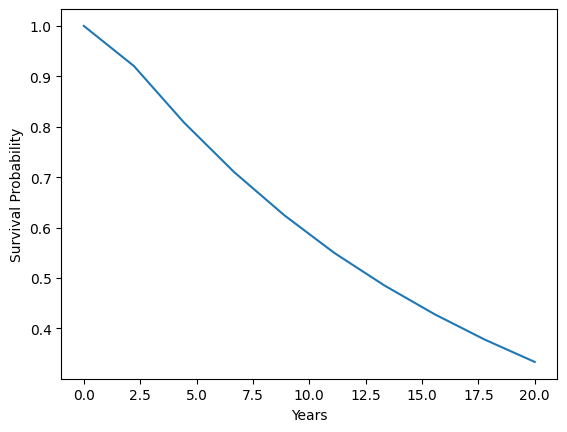

In [15]:
plt.plot(times, survival_probs)
plt.xlabel("Years")
plt.ylabel("Survival Probability")

Copyright (c) 2020 Dominic O'Kane